In [48]:
import pandas as pd

In [52]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [53]:
dataset=pd.read_csv('Datarev.csv')

In [54]:
dataset


,No,Height [cm],Weight [kg],BMI [kg/m2],Donor type (deceased 0 / living 1),ABO-incompatible KT,Calcineurin inhibitor (cyclosporine 0 / tacrolimus 1),Antimetabolites or everolimus,Diabetes mellitus,Hypertension,...,eGFR,HbA1c,Ca,P,HDL,LDL,TG,Phase Angle °,Total body water/lean mass,CRP
0,1,170.1,57.7,19.9,0,0,0,MMF,0,1,...,54.0,5.3,9.5,2.2,67,76,113.0,5.463681,73.728814,0.11
1,2,176.2,73.0,23.5,0,0,1,MMF,1,1,...,52.0,7.1,9.9,3.5,63,121,120.0,5.812464,73.889876,0.04
2,3,177.3,71.4,22.7,0,1,1,MMF,0,1,...,45.0,7.1,9.7,3.3,79,92,94.0,4.976879,74.611399,0.07
3,4,166.3,58.0,21.0,1,0,0,MMF,0,0,...,56.0,5.2,9.8,3.6,54,82,155.0,3.958774,74.019608,0.06
4,5,153.1,60.6,25.9,0,0,0,MMF,0,1,...,69.0,6.0,9.7,3.6,53,95,320.0,4.324163,73.937677,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,170.7,79.5,27.3,0,1,1,MMF,1,1,...,35.0,6.5,9.6,3.2,114,118,142.0,4.749141,74.403471,0.06
206,207,161.0,50.5,19.5,1,1,0,MMF,0,0,...,91.0,6.8,9.6,3.9,93,123,46.0,5.090744,73.096447,0.07
207,208,173.0,54.0,18.0,1,1,0,MMF,0,1,...,39.0,5.3,10.5,2.4,67,82,99.0,4.537395,74.609375,0.02
208,209,160.0,52.0,20.3,1,0,0,EVR,0,1,...,31.0,5.6,9.7,3.0,62,132,205.0,6.402526,73.555556,0.01


In [56]:
dataset =dataset[['sCr', 'eGFR','HbA1c']]
dataset

,sCr,eGFR,HbA1c
0,1.52,54.0,5.3
1,1.68,52.0,7.1
2,1.40,45.0,7.1
3,1.19,56.0,5.2
4,0.78,69.0,6.0
...,...,...,...
205,1.82,35.0,6.5
206,0.88,91.0,6.8
207,1.80,39.0,5.3
208,2.38,31.0,5.6


In [57]:
data_log = dataset[['sCr', 'eGFR','HbA1c']]
# print(data.count())
data_log = data_log.astype(float)
data_log

,sCr,eGFR,HbA1c
0,1.52,54.0,5.3
1,1.68,52.0,7.1
2,1.40,45.0,7.1
3,1.19,56.0,5.2
4,0.78,69.0,6.0
...,...,...,...
205,1.82,35.0,6.5
206,0.88,91.0,6.8
207,1.80,39.0,5.3
208,2.38,31.0,5.6


In [58]:
dataset.isnull().sum()

sCr      0
eGFR     1
HbA1c    0
dtype: int64

In [59]:
mean = data_log.mean(skipna=True)
data_log = data_log.fillna(mean)


In [60]:
dataset.isnull().sum()

sCr      0
eGFR     1
HbA1c    0
dtype: int64

In [61]:
#Standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data_normalized, index = data_log.index, columns=data_log.columns)
data_normalized.describe().round(2)

data_normalized

,sCr,eGFR,HbA1c
0,0.479046,-0.100422,-0.882830
1,0.865782,-0.209735,1.492329
2,0.188994,-0.592331,1.492329
3,-0.318597,0.008892,-1.014783
4,-1.309608,0.719428,0.040843
...,...,...,...
205,1.204176,-1.138898,0.700609
206,-1.067898,1.921874,1.096469
207,1.155834,-0.920271,-0.882830
208,2.557752,-1.357524,-0.486970


In [62]:
data_normalized.isnull().sum()

sCr      0
eGFR     0
HbA1c    0
dtype: int64

In [63]:
#Fit KMeans and use elbow method to choose the number of clusters
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sse = {}

for k in range(1, 21):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_

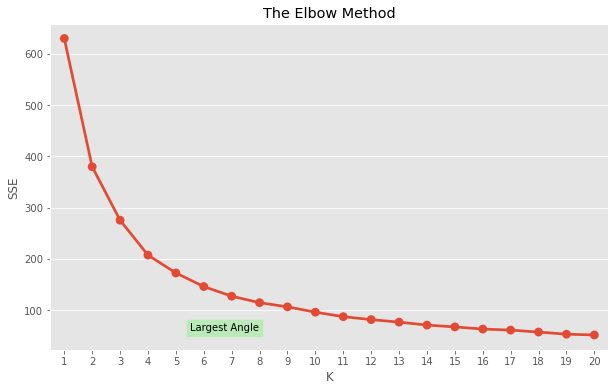

In [65]:
plt.figure(figsize=(10,6))
plt.title('The Elbow Method')

plt.xlabel('K')
plt.ylabel('SSE')
plt.style.use('ggplot')

sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.text(4.5, 60, "Largest Angle", bbox = dict(facecolor = 'lightgreen', alpha = 0.5))
plt.show()

In [66]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

data_rfm = data_normalized.assign(Cluster = cluster_labels)
print(data_rfm)


          sCr      eGFR     HbA1c  Cluster
0    0.479046 -0.100422 -0.882830        1
1    0.865782 -0.209735  1.492329        3
2    0.188994 -0.592331  1.492329        3
3   -0.318597  0.008892 -1.014783        1
4   -1.309608  0.719428  0.040843        0
..        ...       ...       ...      ...
205  1.204176 -1.138898  0.700609        2
206 -1.067898  1.921874  1.096469        0
207  1.155834 -0.920271 -0.882830        2
208  2.557752 -1.357524 -0.486970        2
209  1.155834 -0.428362 -0.223064        2

[210 rows x 4 columns]


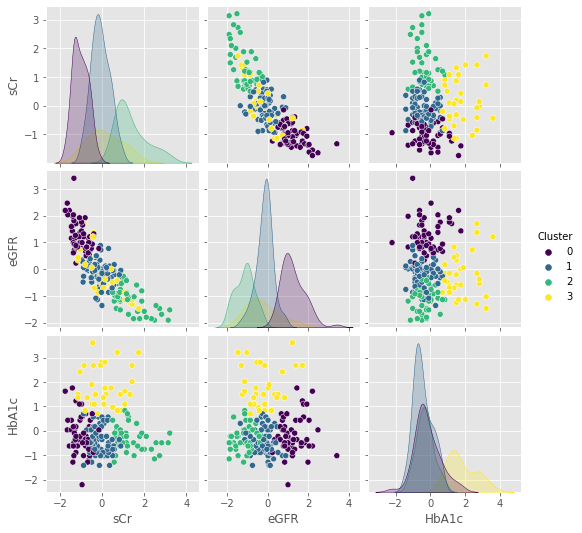

In [67]:
import seaborn as sns

# Add cluster labels to your DataFrame
data_rfm = data_normalized.assign(Cluster=cluster_labels)

# Visualize the relationship between pairs of features, colored by cluster labels
sns.pairplot(data_rfm, hue='Cluster', palette='viridis')
plt.show()


sCr        210
eGFR       210
HbA1c      210
Cluster    210
dtype: int64


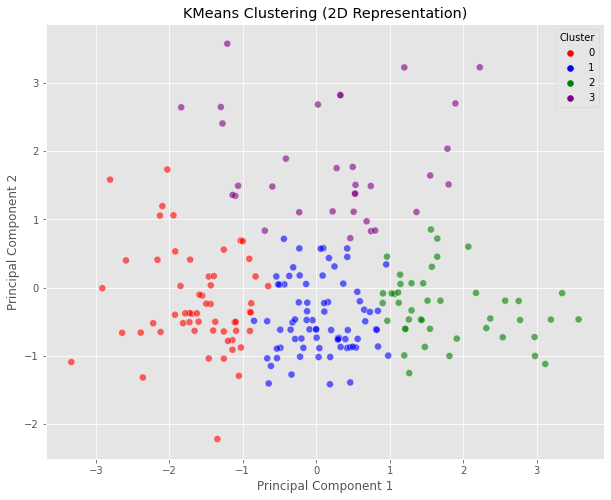

In [68]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

# Add cluster labels to your DataFrame
data_rfm = data_normalized.assign(Cluster=cluster_labels)
print(data_rfm.count())
# Create a scatter plot of the first two principal components, colored by cluster labels


plt.figure(figsize=(10, 8))
cluster_colors = ['red', 'blue', 'green','purple']
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue='Cluster', data=data_rfm, palette=cluster_colors, s=50, alpha=0.6)
plt.title('KMeans Clustering (2D Representation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


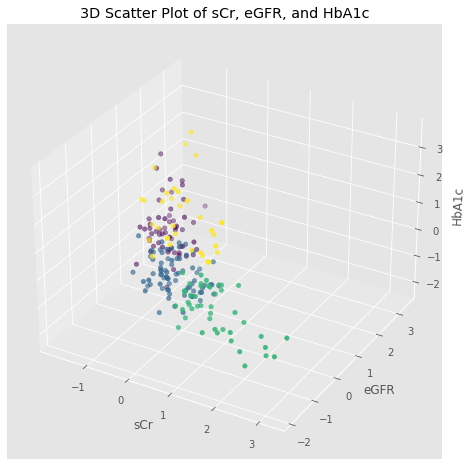

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data_normalized['sCr'], data_normalized['eGFR'], data_normalized['HbA1c'], c=kmeans.labels_, cmap='viridis')

# Set labels and title
ax.set_xlabel('sCr')
ax.set_ylabel('eGFR')
ax.set_zlabel('HbA1c')
plt.title('3D Scatter Plot of sCr, eGFR, and HbA1c')

plt.show()


In [72]:



kmeans_model = kmeans  
scalerr = scaler  

def get_user_inputs():
    input1 = float(input("Enter the Value for sCr: "))
    input2 = float(input("Enter the value for eFGR: "))
    input3 = float(input("Enter the value for HbA1c: "))
    return input1, input2, input3

def scale_input(scaler, input_data):
    scaled_input = scalerr.transform([input_data])
    return scaled_input

def predict_cluster(kmeans_model, scaled_input):
    predicted_cluster = kmeans_model.predict(scaled_input)
    return predicted_cluster[0]

def main():
    if kmeans_model is None or scaler is None:
        print("Please load the pre-trained model and scaler.")
        return

    # Get user inputs
    input1, input2,input3 = get_user_inputs()
    input_data = np.array([input1, input2,input3])

    # Scale user input
    scaled_input = scale_input(scaler, input_data)

    # Predict cluster
    predicted_cluster = predict_cluster(kmeans_model, scaled_input)
    
    print("Predicted cluster number:", predicted_cluster)

if __name__ == "__main__":
    main()


Enter the first input: 1.59
Enter the second input: 78
Enter the Third input: 5.71
Predicted cluster number: 1
